In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%config InlineBackend.figure_format = 'svg'
df = pd.read_csv('data/telecom_churn.csv')
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


array([[<AxesSubplot:title={'center':'Total day minutes'}>,
        <AxesSubplot:title={'center':'Total intl calls'}>]], dtype=object)

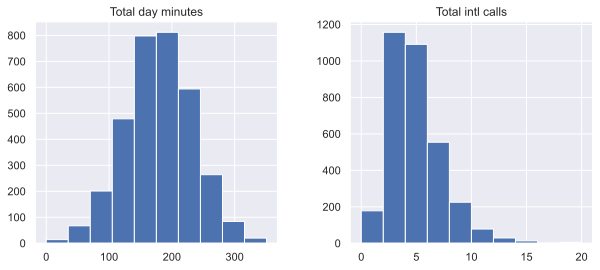

In [11]:
features = ['Total day minutes','Total intl calls']
df[features].hist(figsize=(10, 4))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

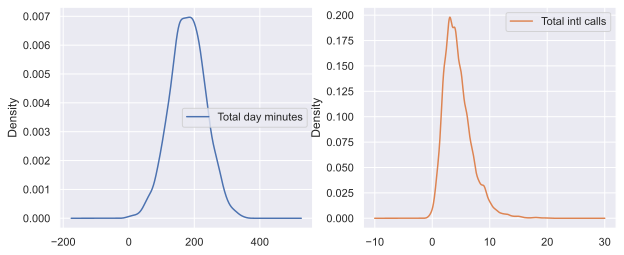

In [17]:
df[features].plot(kind='density', subplots=True, layout=(1,2), sharex=False, figsize=(10,4))

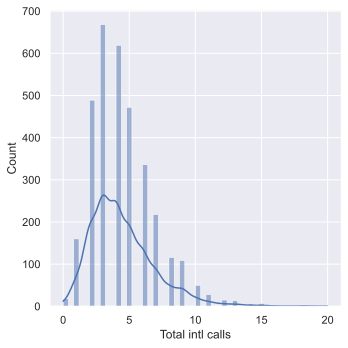

In [25]:
sns.displot(df['Total intl calls'], kde=True)

<AxesSubplot:xlabel='Total intl calls'>

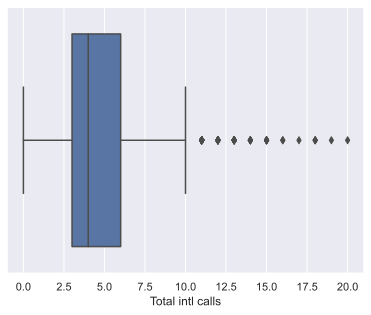

In [26]:
sns.boxplot(x = 'Total intl calls', data = df)

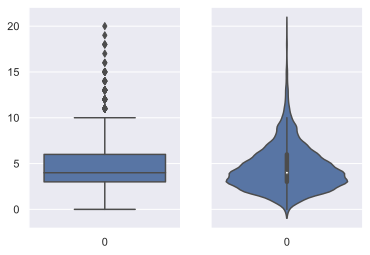

In [29]:
_,axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

In [30]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


In [31]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

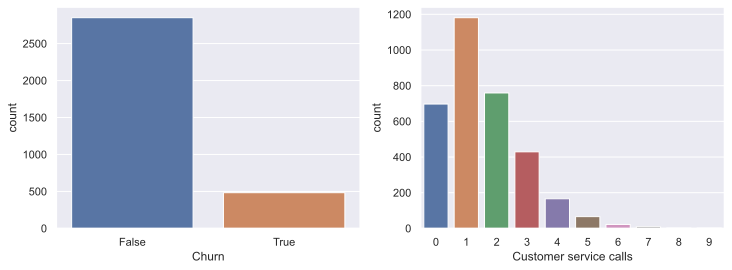

In [32]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

<Axes: >

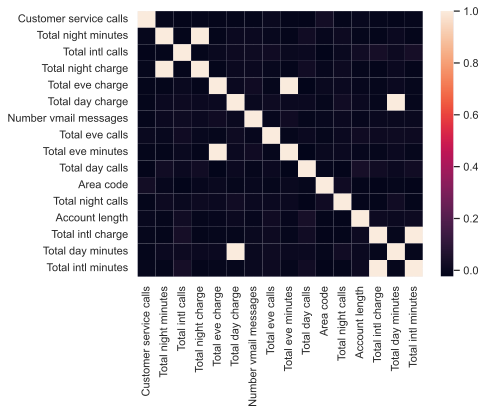

In [27]:
numerical = list(
    set(df.columns) - set([
        'State',
        'International plan',
        'Voice mail plan',
        'Churn'
    ])
)
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

<Axes: >

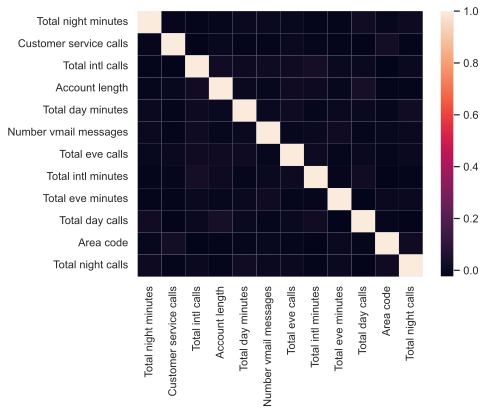

In [28]:
numerical = list(
    set(numerical) - set([
    'Total intl charge',
    'Total night charge',
    'Total eve charge',
    'Total day charge'
    ])
)
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

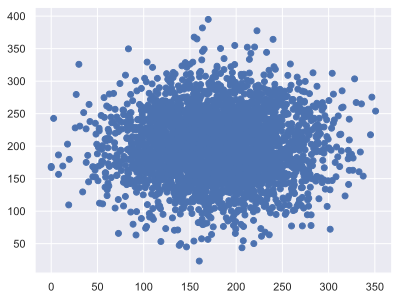

In [39]:
plt.scatter(df['Total day minutes'], df['Total night minutes'])

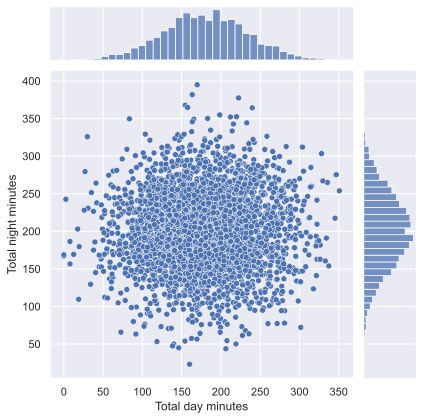

In [40]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

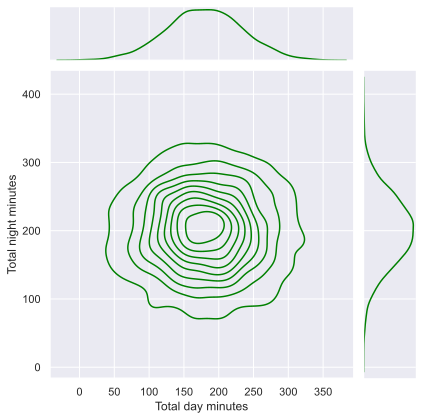

In [41]:
sns.jointplot(
    x='Total day minutes', y='Total night minutes', data=df,kind='kde', color='green'
)

<Axes: xlabel='Total day minutes', ylabel='Total night minutes'>

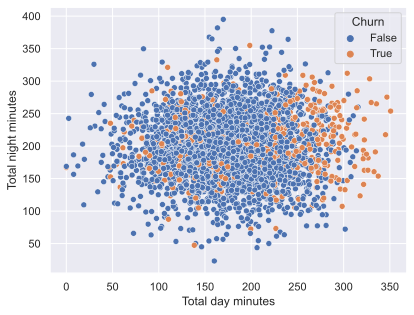

In [24]:
sns.scatterplot(x = 'Total day minutes', y = 'Total night minutes', data = df, hue='Churn')

IndexError: index 3 is out of bounds for axis 0 with size 3

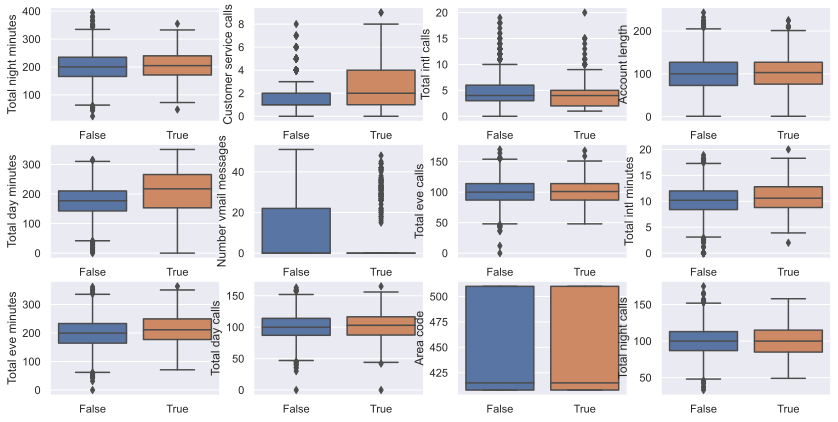

In [33]:
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(14, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();


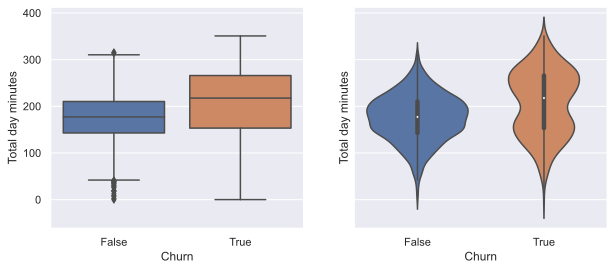

In [34]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);


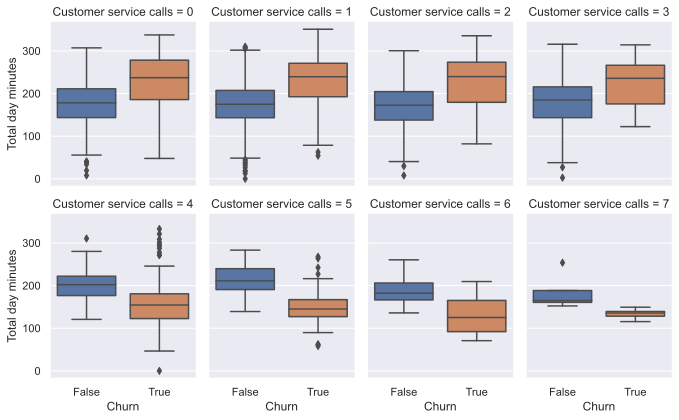

In [35]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
);